In [376]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib

Reading in the data

In [377]:
with open("planets_28-04-2024_no_EqT.csv", 'r') as planet_file:
    reader = csv.reader(planet_file)
    print("Data info:")
    for i, row in enumerate(reader):
        if i < 27:
            print(row)

df = pd.read_csv("planets_28-04-2024_no_EqT_trimmed.csv", sep=',')
#df.head()

# only select planets with periods < 6000 days and masses < 10000 M_Earth
df_cropped =  df[df["pl_orbper"] < 6000]
df_cropped = df_cropped[df_cropped["pl_bmasse"] < 10000]
#df_cropped.head()

Data info:
['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu']
['# Sun Apr 28 00:25:28 2024']
['#']
['# User preference: *']
['#']
['# CONSTRAINT:  where (pl_controv_flag = 0']
['# CONSTRAINT:  and pl_orbperstr not null']
['# CONSTRAINT:  and pl_orbsmaxstr not null']
['# CONSTRAINT:  and pl_radestr not null']
['# CONSTRAINT:  and pl_bmassestr not null']
['# CONSTRAINT:  and pl_densstr not null)']
['#']
['# COLUMN pl_name:        Planet Name']
['# COLUMN hostname:       Host Name']
['# COLUMN sy_pnum:        Number of Planets']
['# COLUMN pl_controv_flag: Controversial Flag']
['# COLUMN pl_orbper:      Orbital Period [days]']
['# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au]']
['# COLUMN pl_rade:        Planet Radius [Earth Radius]']
['# COLUMN pl_radj:        Planet Radius [Jupiter Radius]']
['# COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]']
['# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]']
['# 

Separating out the planets for the highlights. pd.DataFrame.head() only displays the first five rows, but all siz planets are in the dataframe.

In [378]:
# spelling needs to be the EXACT same as in the databse
# in order of hot Jup --> terrestrial world, same as in the infographic
planets = ["TrES-2 b", "Kepler-167 e", "TOI-332 b", "TOI-715 b", "Kepler-78 b", "TRAPPIST-1 f"]

# pandas concat() stitches dataframes together by row
df_list = []
for name in planets:
    df_list.append(df_cropped[df_cropped["pl_name"] == name])
planets_df = pd.concat(df_list)
display(planets_df)

# solar system, source: https://nssdc.gsfc.nasa.gov/planetary/factsheet/index.html
sol_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
sol_masses = [0.330, 4.87, 5.97, 0.642, 1898, 568, 86.8, 102] # 10^24 kg
sol_radii = [4879/2, 12104/2, 12756/2, 6792/2, 142984/2, 120536/2, 51118/2, 49528/2] # diameter/2
sol_period = [88., 224.7, 265.2, 687., 4331, 10747., 30589., 59800.] # days
sol_system = pd.DataFrame(data = [sol_radii, sol_period, sol_masses], columns = sol_names,index = ["Radius (km)", "Orbital period (days)", "Mass (10^24 kg)"])
sol_system = sol_system.transpose()
sol_system


,pl_name,hostname,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,st_spectype,st_teff
4709,TrES-2 b,TrES-2,1,0,2.470630,0.03563,15.244,1.360,473.56670,1.49000,Mass,0.884000,G0 V,5850.0
2511,Kepler-167 e,Kepler-167,4,0,1071.232050,1.88300,10.160,0.906,321.00669,1.01000,Mass,1.680000,K4,4884.0
4576,TOI-332 b,TOI-332,1,0,0.777038,0.01590,3.200,0.285,57.20000,0.17997,Mass,9.600000,K0 V,5251.0
4666,TOI-715 b,TOI-715,1,0,19.288004,0.08300,1.550,0.138,3.02000,0.00951,M-R relationship,4.460000,M4,3075.0
3999,Kepler-78 b,Kepler-78,1,0,0.355007,0.00901,1.201,0.107,1.68000,0.00529,Mass,5.330000,G,5058.0
4695,TRAPPIST-1 f,TRAPPIST-1,7,0,9.207540,0.03849,1.045,0.093,1.03900,0.00327,Mass,5.022904,NaN,2566.0


,Radius (km),Orbital period (days),Mass (10^24 kg)
Mercury,2439.5,88.0,0.330
Venus,6052.0,224.7,4.870
Earth,6378.0,265.2,5.970
Mars,3396.0,687.0,0.642
Jupiter,71492.0,4331.0,1898.000
Saturn,60268.0,10747.0,568.000
Uranus,25559.0,30589.0,86.800
Neptune,24764.0,59800.0,102.000


#### Types of planets
I put every type of planet into a separate dataframe. They are based on the distinctions as described in the accompanying pdf.

Nope, that is not the way to go because this does not allow for overlap in the terrestrials and super earths, for instance. I need to work with coloured background instead.

https://plotly.com/python/filled-area-plots/ 

In [379]:
# terrestrial planets
mask = (df_cropped["pl_rade"] <= 1.2)
ter_planets = df_cropped.loc[mask]
ter_planets.sort_values('pl_rade')

# Super Earths -  I need to check these constraints
mask2 = (df_cropped["pl_rade"] > 1.2) & (df_cropped["pl_rade"] <= 2)
sup_planets = df_cropped.loc[mask2]
sup_planets.sort_values('pl_rade')

# neptunian planets
mask3 = (df_cropped['pl_rade'] > 2) & (df_cropped['pl_rade'] <= 9)
nep_planets = df_cropped.loc[mask3]
nep_planets.sort_values('pl_rade')

# gas giants
gg_planets = df_cropped[df_cropped["pl_rade"] >= 9]
coldgg = gg_planets[gg_planets['pl_orbper'] > 200]
hotgg = gg_planets[gg_planets['pl_orbper'] < 10]
gg_planets.sort_values('pl_rade')
coldgg.sort_values('pl_rade')
hotgg.sort_values('pl_rade')

# lava worlds
lava_planets = ter_planets[ter_planets['pl_orbper'] < 2]
lava_planets.sort_values('pl_rade')

# taking the highest and lowest radius values for the gradients in the plot
gg_lo = gg_planets[gg_planets['pl_rade'] < 12.]
nep_hi = nep_planets[nep_planets['pl_rade'] > 6.5]
nep_lo = nep_planets[nep_planets['pl_rade'] < 2.5]
sup_hi = sup_planets[sup_planets['pl_rade'] > 1.5]
sup_lo = sup_planets[sup_planets['pl_rade'] < 1.4]
ter_hi = ter_planets[ter_planets['pl_rade'] > 0.8]

### Scatterplot
### Plotly
I'm still playing around with settings and size differences. Plotly is probably the nicest: it's good for illustrating size differences and gradients. And labels of data.

Mass-period looks prettier, but radius-period has more info and is also better justified given the Mass*sin(i) limit. We'll add temperature to the data (need to update the dataset then, to skip NaNs).

In [380]:
# # a simple scatter plot
# fig = px.scatter(gg_planets, x = "pl_orbper", y = "pl_rade", 
#                  hover_name = "pl_name", 
#                  hover_data =["pl_dens"], 
#                  size ="pl_bmasse", 
#                  title="Mass-orbital period, marker shows radius", 
#                  template="plotly_dark")
# fig.update_xaxes(type="log")
# fig.update_yaxes(type="log")
# fig.show()
# fig = px.scatter(df_cropped, x = "pl_orbper", y = "pl_bmasse", 
#                  hover_name = "pl_name", 
#                  hover_data =["pl_dens"], 
#                  size ="pl_rade", 
#                  title="Mass-orbital period, marker shows radius", 
#                  template="plotly_dark")
# fig.update_xaxes(type="log")
# fig.update_yaxes(type="log")
# fig.show()


In [381]:
# # a simple scatter plot
# fig2 = px.scatter(df_cropped, x = "pl_orbper", y = "pl_bmasse", 
#                   hover_name = "pl_name", 
#                   hover_data =["pl_dens"],
#                   color = "pl_rade", 
#                   size = "pl_rade",
#                   title="Same plot, different style", 
#                   template = "simple_white")
# fig2.update_xaxes(type="log")
# fig2.update_yaxes(type="log")
# fig2.show()

### Matplotlib
I can also set the marker size in matplotlib. I think I'm going to use matplotlib instead, because I know how to configure all those things.

In [382]:
# styles = []
# for i in range(len(matplotlib.style.available)):
#     styles.append(matplotlib.style.available[i])
#     print(i, styles[i])

Testing out one style. 

Notes:
* Don't like the harsh borders between markers, does not convey the diffuseness of the types well. 
* Color gradient is cool, but will probably implement in the background shape instead.
* Make markers less saturated in color and smaller. No black edges, perhaps white if dark background?
* Dark background I think
* Solar system needs different markers, not circles --> stars maybe?

In [383]:
# s = 5*np.log(coldgg.pl_bmasse)
all_exoplanets = [gg_planets, coldgg, hotgg, nep_planets, sup_planets, ter_planets, lava_planets]
colors = ['blue', 'red', 'white', 'purple', 'green', 'orange']

# #print(styles[7])
# plt.style.use('default')

# # xlines in order: 10 days - 
# fig = plt.figure(dpi = 300)
# ax = fig.add_subplot()
# ax.grid(True)
# # scatters
# # ax.scatter(df_cropped.pl_orbper, 
# #         df_cropped.pl_rade,  
# #         edgecolors='none')

# ax.scatter(all_exoplanets[0].pl_orbper, 
#         all_exoplanets[0].pl_rade, 
#         edgecolors='none', 
#         c = np.log(gg_planets.pl_orbper), 
#         cmap = 'magma_r')



# for k in range(6):
#     if (k not in [0,1]):
#         ax.scatter(all_exoplanets[k+1].pl_orbper, 
#                 all_exoplanets[k+1].pl_rade, 
#                 edgecolors='k', c = colors[k], s= 3)

# ax.scatter(sol_system["Orbital period (days)"], sol_system["Radius (km)"]/6731, edgecolors='pink')
# ax.scatter(planets_df.pl_orbper, planets_df.pl_rade, c = 'k', s = 3)

# # plot settings
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel("P (days)")
# ax.set_ylabel(r"R (R$_{\bigoplus}$)")
# ax.set_ylabel(r"M (M$_{\bigoplus}$)")

#### The right one
We're using this one.

Text(0, 0.5, 'R (R$_{\\bigoplus}$)')

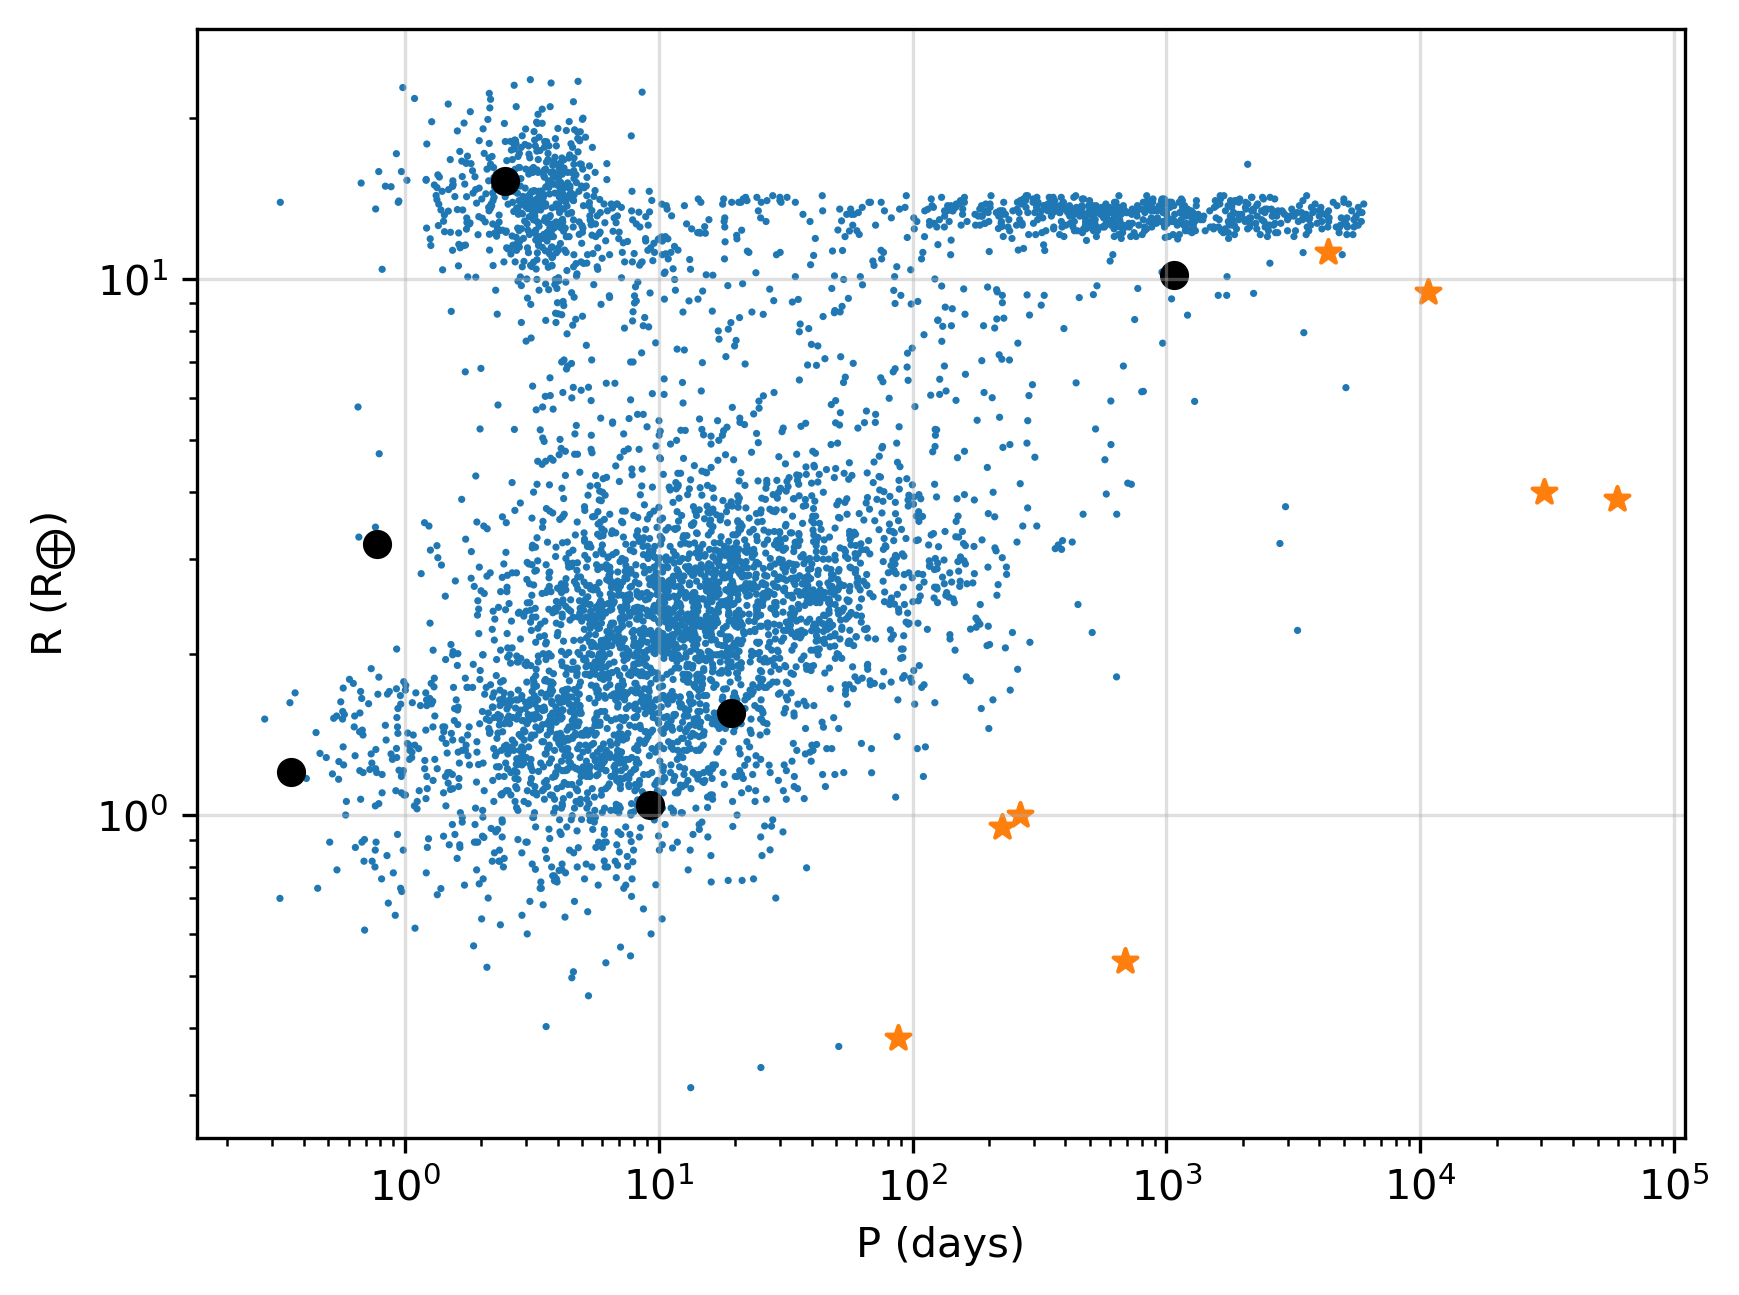

In [384]:
plt.style.use('default')

# xlines in order: 10 days - 
fig = plt.figure(dpi = 300)
ax = fig.add_subplot()
ax.grid(True, alpha = 0.4)

# scatters
ax.scatter(df_cropped.pl_orbper, 
        df_cropped.pl_rade,  
        edgecolors='none', 
        s = 3)

# ax.scatter(all_exoplanets[0].pl_orbper, 
#         all_exoplanets[0].pl_rade, 
#         edgecolors='none', 
#         c = np.log(gg_planets.pl_orbper), 
#         cmap = 'magma_r', 
#         s = 3)

ax.scatter(sol_system["Orbital period (days)"], sol_system["Radius (km)"]/6371, marker = '*')
ax.scatter(planets_df.pl_orbper, planets_df.pl_rade, c = 'k')

# plot settings
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("P (days)")
ax.set_ylabel(r"R (R$_{\bigoplus}$)")
#ax.set_ylabel(r"M (M$_{\bigoplus}$)")

Trying out marker style colour gradients. (vmin, vmax) range closer together maps gradient over narrower range, wider apart spreads out the colour.

Tested the image for colour blindness using this website: https://www.color-blindness.com/coblis-color-blindness-simulator/. Originally used bright red dots for the highlighted exoplanets but that completely disappears. Used this website (https://davidmathlogic.com/colorblind/#%236355BF-%232C7BD4-%232FA254) to find a colour that does work. However, none really satisfied it so I chose red with a darker border. It works well enough, especially since the highlighted planets will have arrows pointing away from them anyway which singles them out as well.

C:\Users\Lena\AppData\Local\Temp\ipykernel_17216\3632417281.py:135: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,25)


Text(2500.0, 0.95, 'Terrestrial planets')

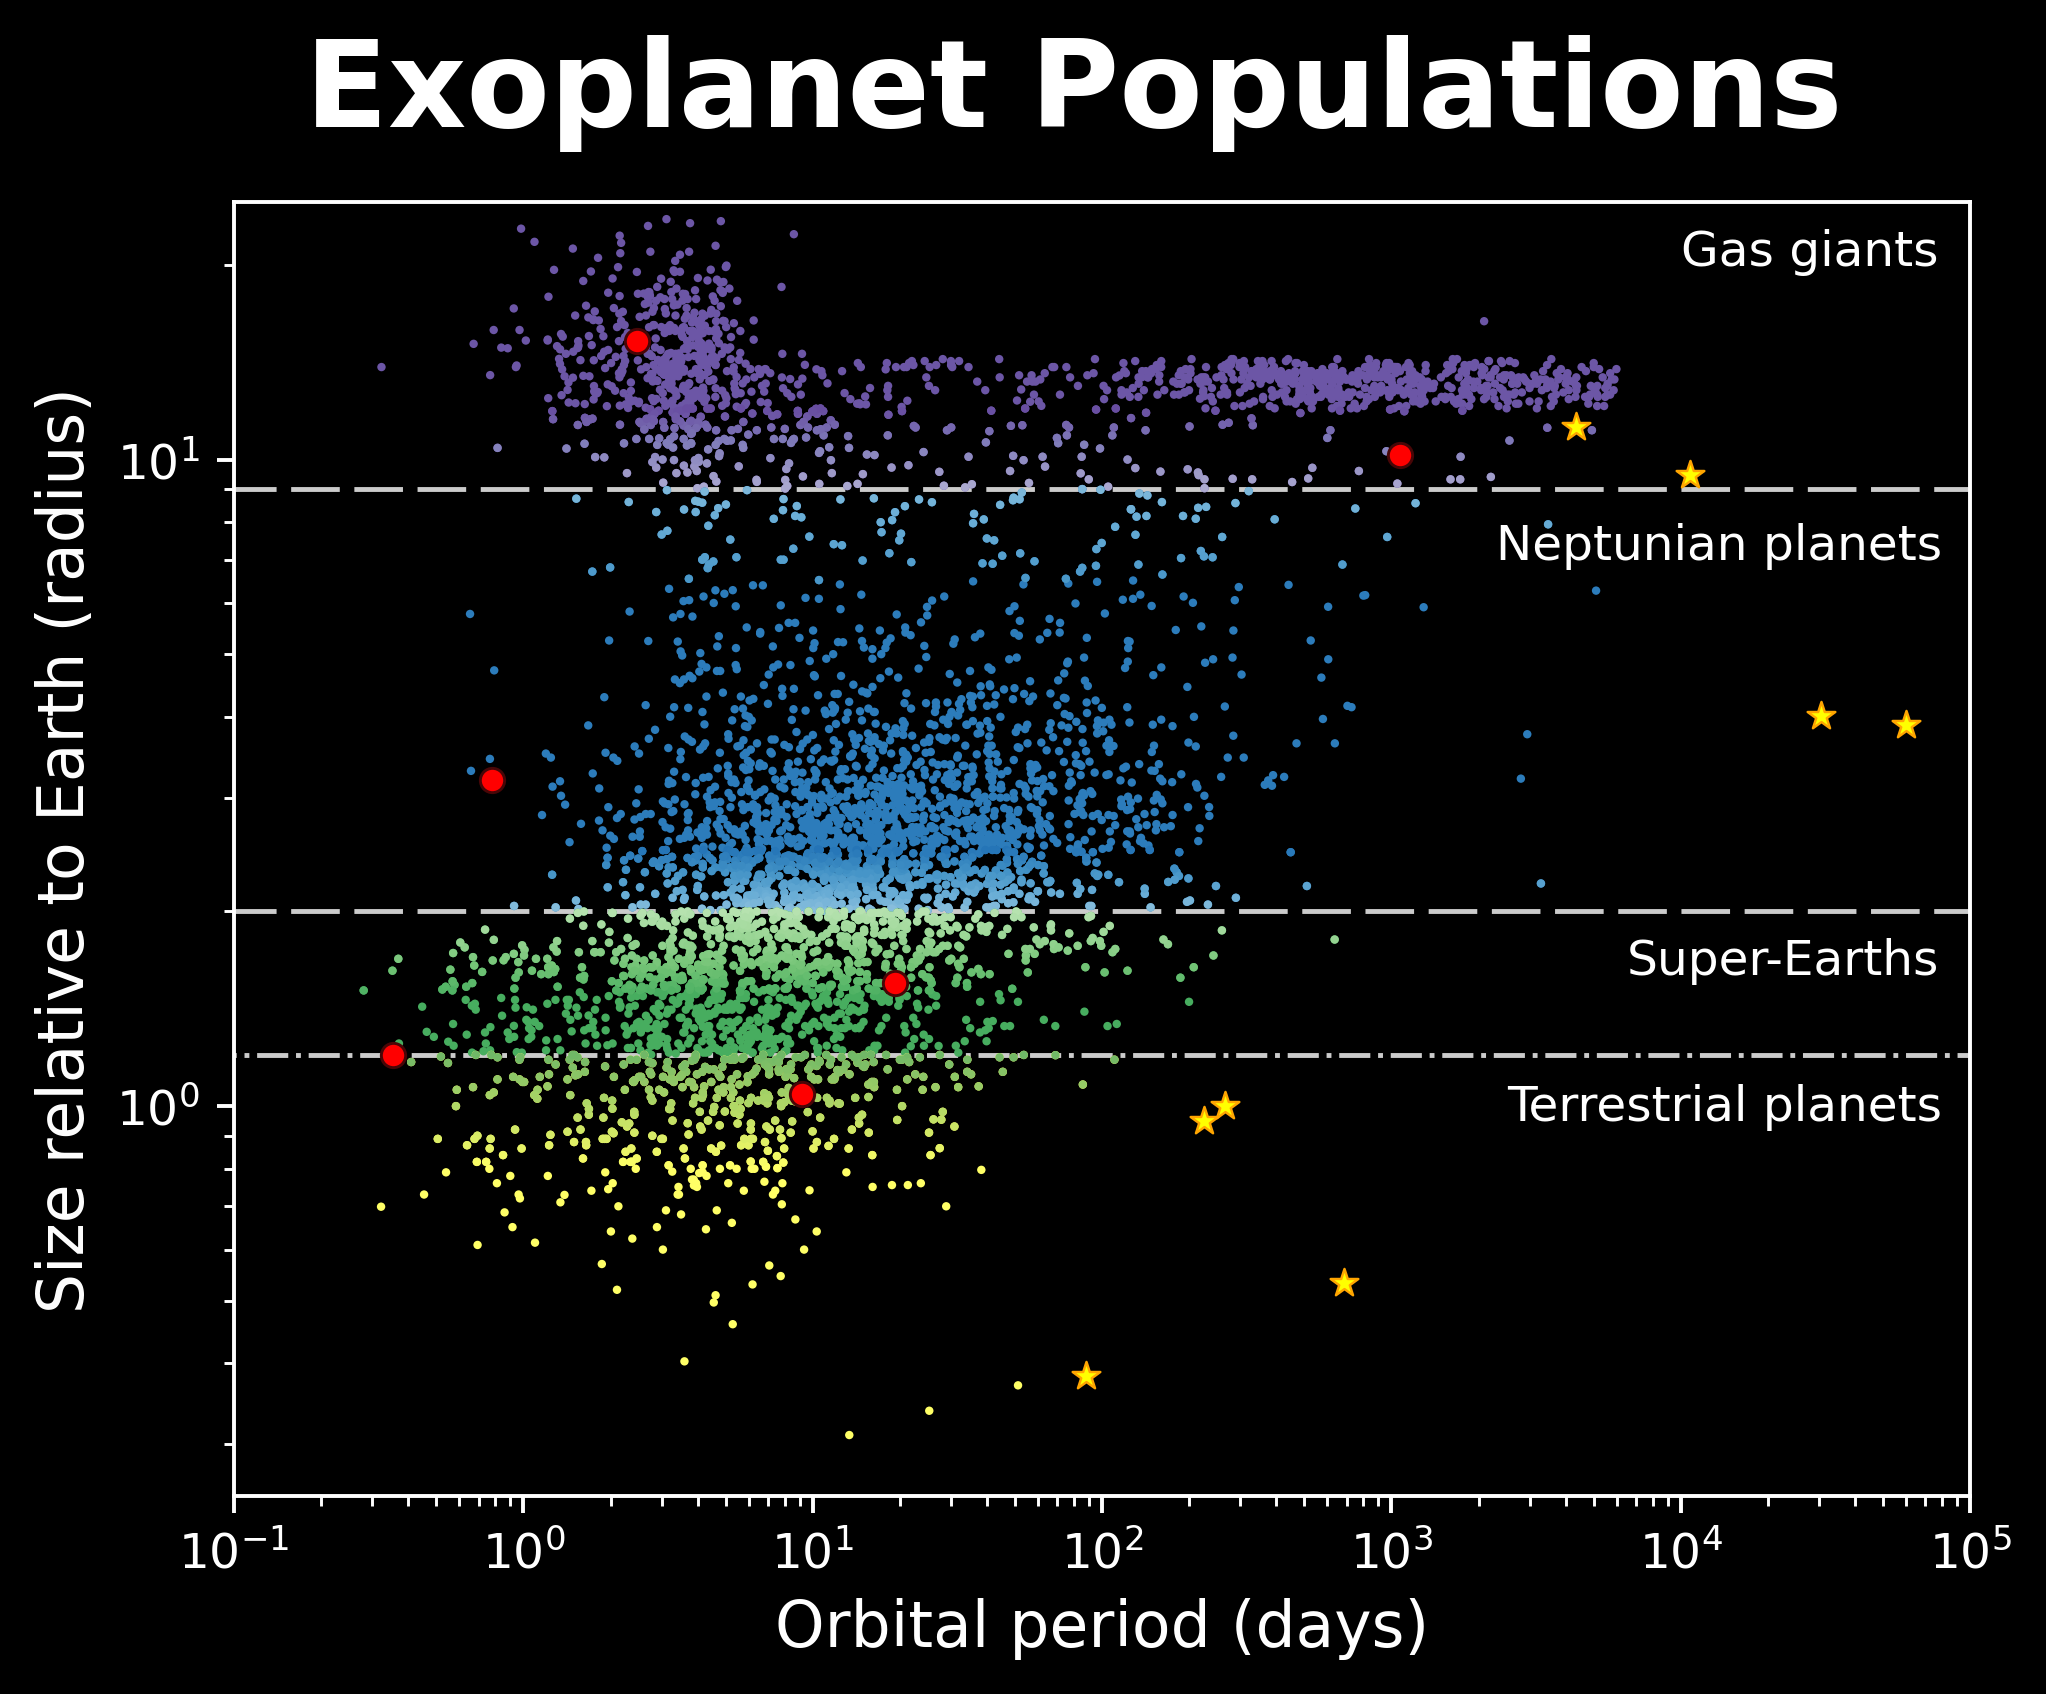

In [385]:
# s = 5*np.log(coldgg.pl_bmasse)
all_exoplanets = [gg_planets, nep_planets, sup_planets, ter_planets, lava_planets]
#color_maps = ['inferno', 'red', 'white', 'purple', 'green', 'orange']
# '#FF00E4', the pink colour
ys = [1.2, 2., 9.]
s = 3
xmin = 0
plt.style.use('dark_background')

# xlines in order: 10 days - 
fig = plt.figure(dpi = 350)
fig.suptitle("Exoplanet Populations", fontsize=25, fontweight='bold')
ax = fig.add_subplot()
# ax.grid(True, alpha = 0.4)
# ax.set_axisbelow(True)

# borders of the planet groups
ax.scatter(sol_system["Orbital period (days)"], sol_system["Radius (km)"]/6371, marker = '*', c='yellow', edgecolor = 'orange', linewidths = 0.5, zorder = 10)
ax.scatter(planets_df.pl_orbper, planets_df.pl_rade, edgecolor = '#480607', c = 'red', s = 25, linewidths = 0.6, zorder = 10)
for i in range(3):
    if i == 0:
        linestyle = 'dashdot'
        #xmin = 2
    else:
        linestyle = (5, (10,3))
        #xmin = 0
    ax.hlines(y = ys[i],xmin = xmin, xmax = 1e5, linestyles = linestyle, colors = 'white', linewidth = 1, alpha = 0.8, zorder = 0)

# ax.vlines(x=10, ymin = 9, ymax = 25, linestyles = 'dotted', colors = 'white', linewidth = 1, alpha = 0.8, zorder = 0)
# ax.vlines(x=2, ymin = 0, ymax = 2, linestyles = 'dotted', colors = 'white', linewidth = 1, alpha = 0.8, zorder = 0)

# # scatters
# ax.scatter(df_cropped.pl_orbper, 
#         df_cropped.pl_rade,  
#         edgecolors='none', 
#         s = 3)

# ax.scatter(all_exoplanets[0].pl_orbper, 
#         all_exoplanets[0].pl_rade, 
#         edgecolors='none', 
#         c = np.log(gg_planets.pl_orbper), 
#         cmap = 'magma_r', 
#         s = 3)

ax.scatter(all_exoplanets[0].pl_orbper, 
    all_exoplanets[0].pl_rade, 
    edgecolors='none', 
    c='#6c56a6', 
    s = s) 

ax.scatter(gg_lo.pl_orbper, 
    gg_lo.pl_rade, 
    edgecolors='none', 
    c = np.log(gg_lo.pl_rade),
    cmap = 'Purples', vmin = 1.8, vmax = 2.7,
    s= s)

# ax.scatter(gg_lo.pl_orbper, 
#     gg_lo.pl_rade, 
#     edgecolors='none', 
#     c = np.log(gg_lo.pl_rade),
#     cmap = 'YlOrBr', vmin = 1.8, vmax = 2.9,
#     s= s)


ax.scatter(all_exoplanets[1].pl_orbper, 
    all_exoplanets[1].pl_rade, 
    edgecolors='none', 
    c = '#2c7cbb',
    s= s)

ax.scatter(nep_hi.pl_orbper, 
    nep_hi.pl_rade, 
    edgecolors='none', 
    c = np.log(nep_hi.pl_rade),
    cmap = 'Blues_r',  vmin = 1, vmax = 3.2,   # vmin lower = lighter, vmax higher = darker
    s=s)

ax.scatter(nep_lo.pl_orbper, 
    nep_lo.pl_rade, 
    edgecolors='none', 
    c = np.log(nep_lo.pl_rade),
    cmap = 'Blues', vmin = 0.4, vmax = 1.1,
    s= s)


ax.scatter(all_exoplanets[2].pl_orbper, 
    all_exoplanets[2].pl_rade, 
    edgecolors='none', 
    c='#47ad5f',
    s= s)

ax.scatter(sup_hi.pl_orbper, 
    sup_hi.pl_rade, 
    edgecolors='none', 
    c = np.log(sup_hi.pl_rade),
    cmap = 'Greens_r', vmin = -0., vmax = 1.,
    s= s)

# ax.scatter(sup_lo.pl_orbper, 
#     sup_lo.pl_rade, 
#     edgecolors='none', 
#     c = np.log(sup_lo.pl_rade),
#     cmap = 'Greens', vmin = -0.2, vmax = 0.8,
#     s= s)


ax.scatter(all_exoplanets[3].pl_orbper, 
    all_exoplanets[3].pl_rade, 
    edgecolors='none', 
    c = '#ffff66',
    s= 3)

ax.scatter(ter_hi.pl_orbper, 
    ter_hi.pl_rade, 
    edgecolors='none', 
    c = np.log(ter_hi.pl_rade),
    cmap = 'summer_r', vmax = 0.5,
    s= s)

# ax.scatter(all_exoplanets[4].pl_orbper, 
#     all_exoplanets[4].pl_rade, 
#     edgecolors='none', 
#     c = np.log(all_exoplanets[4].pl_orbper),
#     cmap = 'Reds_r', vmin = -5, vmax = 2, 
#     s= s)


# plot settings
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Orbital period (days)", fontsize = 13)
ax.set_ylabel("Size relative to Earth (radius)", fontsize = 13)
ax.set_xlim(1e-1,1e5)
ax.set_ylim(0,25)

# text
ax.annotate('Gas giants', xy=(1, 1e1), xytext=(1e4, 2.0e1))
ax.annotate('Neptunian planets', xy=(1, 1e1), xytext=(2.3e3, 7e0))
ax.annotate('Super-Earths', xy=(1, 1e1), xytext=(6.5e3, 1.6e0))
ax.annotate('Terrestrial planets', xy=(1, 1e1), xytext=(2.5e3, 0.95e0))


Plotting all styles.

In [386]:
# for st in styles:
#     print(st)
#     plt.style.use(st)

#     # xlines in order: 10 days - 
#     fig = plt.figure(dpi = 150)
#     ax = fig.add_subplot()
#     ax.scatter(df_cropped.pl_orbper, 
#             df_cropped.pl_bmasse, 
#             s = 5*df_cropped.pl_rade, 
#             edgecolors='none', 
#             c = np.log(df_cropped.pl_orbper), 
#             cmap = 'viridis')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.set_xlabel("P (days)")
#     ax.set_ylabel(r"R (R$_{\bigoplus}$)")
#     plt.show()

# # regions
